<a href="https://colab.research.google.com/github/Nguyen379/Mask_detection/blob/main/Analyze_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pwd


'/content'

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection"


/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection


In [ ]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection'

In [ ]:
%ls


'Face Mask Dataset'/   masks_no_improper/      Ref_image.png
 haarcascade/          Preprocess_data.ipynb


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import time
import pickle

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import seaborn as sns
import glob

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset"

In [ ]:
print(path)
print(os.listdir(path))

/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset
['Test', 'Train', 'Validation']


In [ ]:
dataset = {
    "image_path":[],
    "status":[],
    "category":[]
    }
for category in os.listdir(path):
    print(path+"/"+category)
    for status in os.listdir(path+"/"+category):   
        print(path+"/"+category+"/"+status)
        for image in glob.glob(path+"/"+category+"/"+status+"/"+"*.png"):
            # print(image)
            dataset["image_path"].append(image)
            dataset["status"].append(status)
            dataset["category"].append(category)

dataset = pd.DataFrame(dataset)
dataset.head()


/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Test
/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Test/WithoutMask
/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Test/WithMask
/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Train
/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Train/WithMask
/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Train/WithoutMask
/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Validation
/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Validation/WithoutMask
/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Validation/WithMask


,image_path,status,category
0,/content/drive/MyDrive/Colab Notebooks/AI4E/Fi...,WithoutMask,Test
1,/content/drive/MyDrive/Colab Notebooks/AI4E/Fi...,WithoutMask,Test
2,/content/drive/MyDrive/Colab Notebooks/AI4E/Fi...,WithoutMask,Test
3,/content/drive/MyDrive/Colab Notebooks/AI4E/Fi...,WithoutMask,Test
4,/content/drive/MyDrive/Colab Notebooks/AI4E/Fi...,WithoutMask,Test


In [ ]:
print(len(dataset.loc[dataset["category"]=="Validation"]))
print(len(dataset.loc[dataset["category"]=="Test"]))
print(len(dataset.loc[dataset["category"]=="Train"]))
print(len(dataset.loc[dataset["status"]=="WithoutMask"]))
print(len(dataset.loc[dataset["status"]=="WithMask"]))

800
992
10040
5939
5893


# Haar Cascade

In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
face_model = cv2.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/haarcascade/haarcascade_frontalface_default.xml")

[[ 48 190 137 137]]


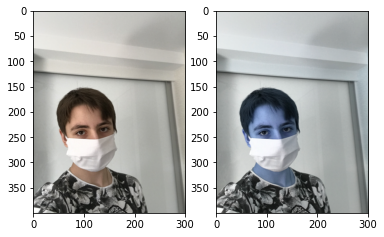

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/masks_no_improper/images/maksssksksss332.png")

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

detected_face = face_model.detectMultiScale(img)
print(detected_face)
colors = [cv2.COLOR_RGB2BGR, cv2.IMREAD_GRAYSCALE]
for n in range(2):
    plt.subplot(1, 2, n+1)
    output_img = cv2.cvtColor(img, colors[n])
    plt.imshow(output_img)

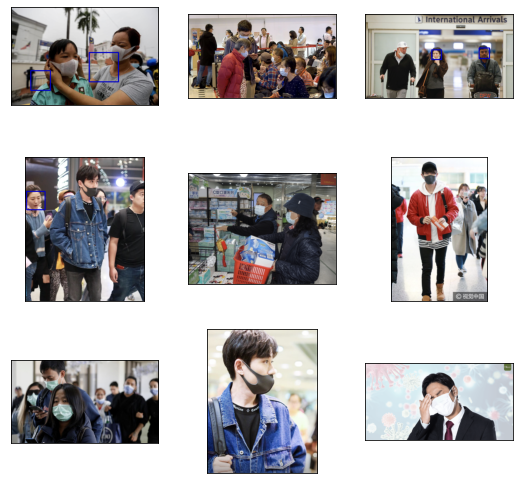

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/masks_no_improper/images/maksssksksss"

plt.figure(figsize=(9,9))
for n in range(9):
    plt.subplot(3,3,n+1)
    img_num = np.random.randint(1, 300)
    img = cv2.imread(path+str(img_num)+".png")
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    detected_face = face_model.detectMultiScale(img)
    output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    for (x,y,w,h) in detected_face:
        cv2.rectangle(output_img, (x,y), (x+w,y+h), (0, 0, 200), 2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(output_img)


In [ ]:
import cv2
import math
from scipy.spatial import distance 
ref_width = 187
Known_distance = 76.2
Known_width = 14.3
 
 
def Focal_Length_Finder(Known_distance, Known_width, ref_image_face_width):
    focal_length = (ref_image_face_width * Known_distance) / Known_width
    return focal_length

def Distance_finder(Focal_Length, Known_width, ref_image_face_width):
    distance = (Known_width * Focal_Length)/ref_image_face_width
    return distance

187


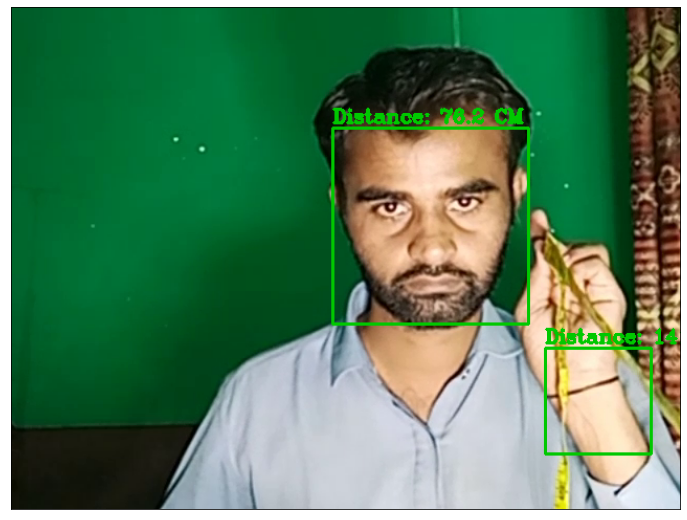

In [ ]:
plt.figure(figsize=(12, 12))
ref_img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Ref_image.png")
ref_img = cv2.cvtColor(ref_img, cv2.IMREAD_GRAYSCALE)
faces = face_model.detectMultiScale(ref_img)
output_img = cv2.cvtColor(ref_img, cv2.COLOR_RGB2BGR)
# ref_width = faces[0][2]
print(ref_width)
for face in range(len(faces)):

    Focal_length_found = Focal_Length_Finder(
        Known_distance, Known_width, ref_width) 

    x, y, w, h =faces[face]
    cv2.rectangle(output_img, (x,y), (x+w,y+h), (0, 200, 0), 2)

    Distance = Distance_finder(
        Focal_length_found, Known_width, faces[face][2])

    cv2.putText(
        output_img, f"Distance: {round(Distance,2)} CM", (x, y-5),
        cv2.FONT_HERSHEY_COMPLEX, 0.6, (0, 200, 0), 2)
plt.xticks([])
plt.yticks([])
plt.imshow(output_img)

In [ ]:
# def detect_distance(detected_face, img):
#     for face in range(len(detected_face)):
#         Focal_length_found = Focal_Length_Finder(
#             Known_distance, Known_width, ref_width) 

#         x, y, w, h = detected_face[face]

#         Distance = Distance_finder(
#             Focal_length_found, Known_width, w)
        
#         cv2.rectangle(img, (x,y), (x+w,y+h), (0, 200, 0), 2)
#         cv2.putText(
#             img, f"{round(Distance,2)} CM", (x, y-5),
#             cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 200, 0), 2)
#     return img

In [ ]:
def screen_distance(detected_face, img):
    distances = []
    for face in range(len(detected_face)):
        Focal_length_found = Focal_Length_Finder(
            Known_distance, Known_width, ref_width) 

        x, y, w, h = detected_face[face]

        Distance = Distance_finder(
            Focal_length_found, Known_width, w)
        distances.append(Distance)
        # cv2.rectangle(img, (x,y), (x+w,y+h), (0, 200, 0), 2)
        # cv2.putText(
        #     img, f"{round(Distance,2)} CM", (x, y-5),
        #     cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 200, 0), 2)
    return distances

In [ ]:
def detect_distance(detected_face, img):
    distances = screen_distance(detected_face, img)

    if len(detected_face) < 2:
        for face in range(len(detected_face)):
            x, y, w, h = detected_face[face]
            cv2.rectangle(img, (x,y), (x+w,y+h), (0, 200, 0), 2)
            cv2.putText(
                img, f"{round(distances[face],2)} CM", (x, y-5),
                cv2.FONT_HERSHEY_COMPLEX, 0.5, (200, 0, 0), 2)
    else:
        # face_width = 0
        # for face in range(len(detected_face)):
        #     face_width += detected_face[face][2]
        # face_width /= len(detected_face)
        label = [0 for n in range(len(detected_face))]
        for face1 in range(0, len(detected_face)-1):
            for face2 in range(face1+1, len(detected_face)):
                face_dist = distance.euclidean(detected_face[face1][:2], 
                                               detected_face[face2][:2])
                face_width = min(detected_face[face1][2], detected_face[face2][2])
                face_dist_actual = (face_dist/face_width*30)
                screen_distance_actual = abs(distances[face1]-distances[face2])
                six_feet = math.sqrt(screen_distance_actual**2 +
                                     face_dist_actual**2)
                print(six_feet)
                if (six_feet < 120):
                    label[face1]=1
                    label[face2]=1
        # output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        for face in range(len(detected_face)):
            (x,y,w,h) = detected_face[face]
            if label[face]==1:
                cv2.rectangle(img, (x,y), (x+w,y+h), (200, 0, 0), 2)
                cv2.putText(
                    img, f"{round(distances[face],2)} CM", (x, y-5),
                    cv2.FONT_HERSHEY_COMPLEX, 0.5, (200, 0, 0), 2)            
            else:
                cv2.rectangle(img, (x,y), (x+w,y+h), (0, 200, 0), 2)
                cv2.putText(
                    img, f"{round(distances[face],2)} CM", (x, y-5),
                    cv2.FONT_HERSHEY_COMPLEX, 0.5, (200, 0, 0), 2)
    return output_img

105.19200124610667
269.20827477146554
38.63995743274493
288.2478542944435
426.4063417101591
274.6491588588186
380.6769716512442
316.19060907445237
457.67441690552175
433.504980397873
53.307144001179616
143.78615136299914
254.1211125648599
169.32545793950658
254.87965932317104
120.86138315200172


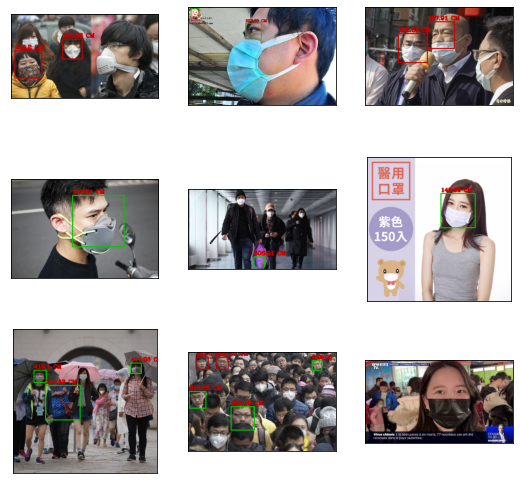

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/masks_no_improper/images/maksssksksss"

plt.figure(figsize=(9,9))
for n in range(9):
    plt.subplot(3,3,n+1)
    img_num = np.random.randint(1, 300)
    img = cv2.imread(path+str(img_num)+".png")
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    detected_face = face_model.detectMultiScale(img)
    output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    output_img = detect_distance(detected_face, output_img)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(output_img)

29.835619180855673
50.19585251668252
54.853235034111556


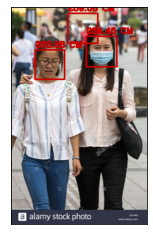

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/masks_no_improper/images/maksssksksss352.png"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
detected_face = face_model.detectMultiScale(img)    
output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
output_img = detect_distance(detected_face, output_img)
plt.xticks([])
plt.yticks([])
plt.imshow(output_img)

125.9578641586174
190.6277725157617
73.79910347489509


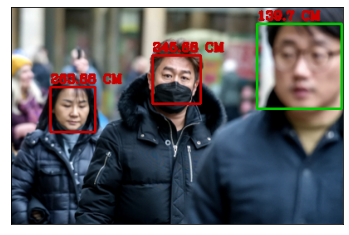

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/masks_no_improper/images/maksssksksss244.png"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
detected_face = face_model.detectMultiScale(img)
output_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
output_img = detect_distance(detected_face, output_img)
plt.xticks([])
plt.yticks([])
plt.imshow(output_img)

In [ ]:
import numpy as np 
np.random.randint(1,len(dataset))

8344

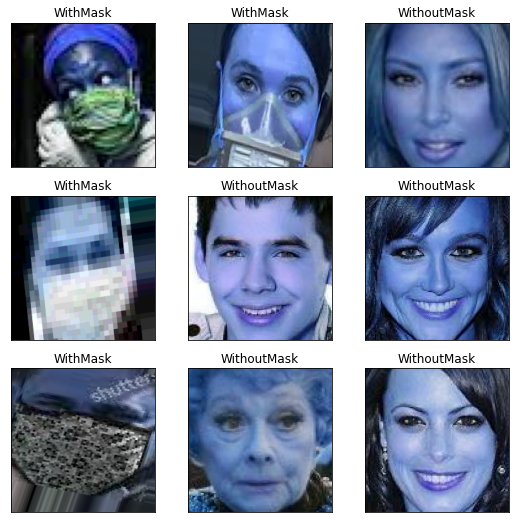

In [ ]:
plt.figure(figsize=(9,9))
for n in range(9):
    plt.subplot(3,3,n+1)
    img_num = np.random.randint(1, len(dataset))
    img = cv2.imread(dataset.loc[img_num, "image_path"])
    img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    plt.title(dataset.loc[img_num, "status"])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    

In [ ]:
train_df = dataset.loc[dataset["category"]=="Train"]
test_df = dataset.loc[dataset["category"]=="Test"]
val_df = dataset[dataset["category"] == "Validation"]
print(len(train_df))
print(len(test_df))
print(len(val_df))

10040
992
800


In [ ]:
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
val_df = val_df.sample(frac=1)
print(train_df.head())

                                              image_path       status category
5523   /content/drive/MyDrive/Colab Notebooks/AI4E/Fi...     WithMask    Train
11019  /content/drive/MyDrive/Colab Notebooks/AI4E/Fi...  WithoutMask    Train
5327   /content/drive/MyDrive/Colab Notebooks/AI4E/Fi...     WithMask    Train
2042   /content/drive/MyDrive/Colab Notebooks/AI4E/Fi...     WithMask    Train
4437   /content/drive/MyDrive/Colab Notebooks/AI4E/Fi...     WithMask    Train


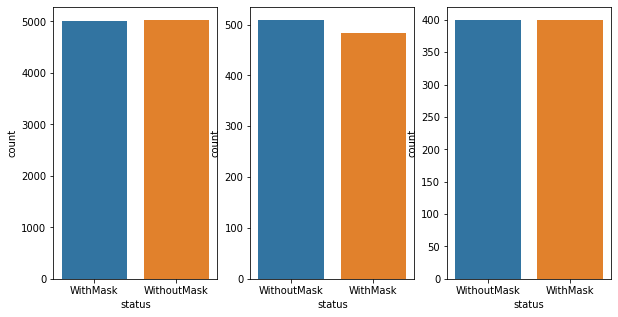

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1,3,1)
sns.countplot(x=train_df["status"])
plt.subplot(1,3,2)
sns.countplot(x=test_df["status"])
plt.subplot(1,3,3)
sns.countplot(x=val_df["status"])

In [ ]:

train_df = train_df.reset_index().drop(["index"], axis=1)
train_df.head()

,image_path,status,category
0,/content/drive/MyDrive/Colab Notebooks/AI4E/Fi...,WithMask,Train
1,/content/drive/MyDrive/Colab Notebooks/AI4E/Fi...,WithoutMask,Train
2,/content/drive/MyDrive/Colab Notebooks/AI4E/Fi...,WithMask,Train
3,/content/drive/MyDrive/Colab Notebooks/AI4E/Fi...,WithMask,Train
4,/content/drive/MyDrive/Colab Notebooks/AI4E/Fi...,WithMask,Train


In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Test"
val_dir = "/content/drive/MyDrive/Colab Notebooks/AI4E/Final Project/Mask detection/Face Mask Dataset/Validation"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255, 
                                   horizontal_flip=True, 
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir, 
                                                    target_size=(224,224),
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    shuffle=True)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,
                                                  target_size=(224,224), 
                                                  class_mode='categorical', 
                                                  batch_size=32,
                                                  shuffle=True)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,
                                                   target_size=(224,224),
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   shuffle=True)

Found 10040 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
x_batch, y_batch = next(train_generator)
print(len(x_batch))
print(y_batch[:5])

32
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


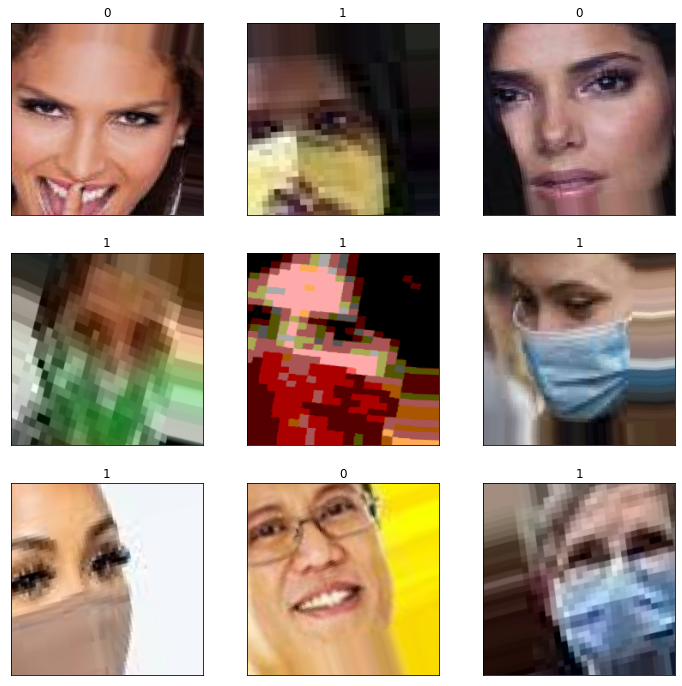

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3,3,i+1)
    image = x_batch[i]
    plt.xticks([])
    plt.yticks([])
    plt.title(int(y_batch[i][0]))
    plt.imshow(image)
